In [1]:
import numpy as np
import pandas as pd
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz
from sklearn import tree
import subprocess
from ipywidgets import interact, IntSlider, fixed, FloatSlider, Dropdown
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/aptem/Downloads/archive/Class/Class_BanknoteAuth.csv')
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Var        1372 non-null float64
Skew       1372 non-null float64
Kurt       1372 non-null float64
Entropy    1372 non-null float64
Class      1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,Var,Skew,Kurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
train = (train - train.min()) / (train.max() - train.min())

In [4]:
features = train.columns.tolist()
target = features.pop(4)
X = train[features]
y = train[target]

In [5]:
x_train, x_test, y_train, y_test=train_test_split(train, y, test_size=0.15)

In [6]:
def tree_model(criterion, max_depth, min_samples_leaf, random_state):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[1].scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
    ax[1].set_xlabel('$x_1$')
    ax[1].set_ylabel('$x_2$')
    tree1 = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=random_state)
    tree1 = tree1.fit(x_train, y_train)
    tree_pred = tree1.predict(x_test)
    for i in precision_recall_fscore_support(y_test, tree_pred):
        print(i[0], i[1])
    plt.show()

In [7]:
interact(tree_model, 
             criterion = Dropdown(options = ["gini", "entropy"], value = "entropy"),
             max_depth = IntSlider(min = 1, max = 10, value = 3),
             min_samples_leaf = IntSlider(min = 1, max = 10, value = 1),
             random_state = IntSlider(min = 100, max = 1000, value = 300, step = 10),
)

interactive(children=(Dropdown(description='criterion', index=1, options=('gini', 'entropy'), value='entropy')…

<function __main__.tree_model(criterion, max_depth, min_samples_leaf, random_state)>

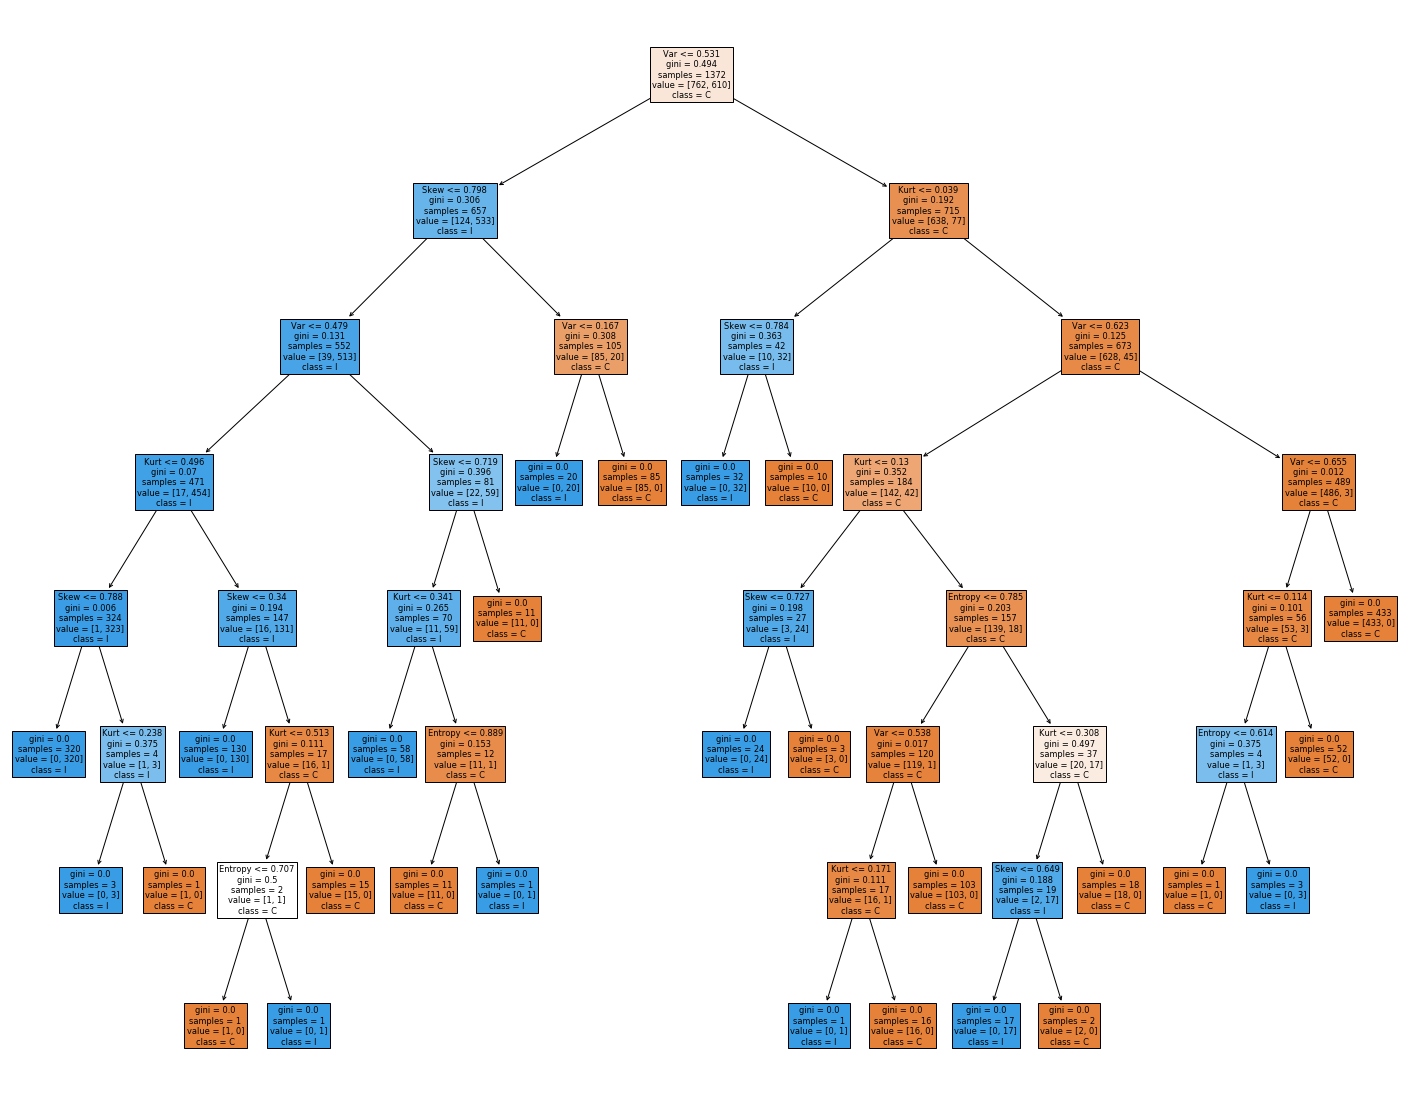

In [8]:
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf, 
                   feature_names = features,  
                   class_names = target,
                   filled = True)

In [9]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_hat2 = forest.predict(x_test)
for i in precision_recall_fscore_support(y_test, y_hat2):
    print(i[0], i[1])

1.0 1.0
1.0 1.0
1.0 1.0
124 82


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
